#Hello<Center> <HR> <font color="blue"> Rearrange the Array </font> <HR> </Center>
   
   Let S: $(a_1, a_2, ..., a_n)$ be the sequence of numbers. Rearrange the sequence such that
   $$ a_i = 
       \begin{cases}
       x & \text{if i is even then $x >= a_j$, $\forall j \in [1,i)$}\\
       y & \text{if i is odd then $y <= a_j$, $\forall j \in [1,i)$}
       \end{cases}
   $$

## Approach-1

If len(arr) is even then last element shall be highest element and second last element shall be smallest element in the output else it will be reversed.

    Time complexity : O(nlog(n)) || Auxiliary Space : O(n)

In [35]:
def rearrange_1(arr, n):
    
    temp = sorted(arr)
    
    arr_Even = False if n%2 else True
    
    i = n - 1
    left, right = 0, n - 1
    while left < right:
        if arr_Even:
            arr[i], arr[i-1] = temp[right], temp[left]
        else:
            arr[i], arr[i-1] = temp[left], temp[right]
        
        i -= 2
        left +=1
        right -= 1
        
    if not arr_Even:
        arr[i] = temp[left]

## Approach-2
    Time complexity : O(nlog(n)) || Auxiliary Space : O(n)

In [21]:
def rearrange_2(arr, n):
    
    temp = sorted(arr)

    start = 0
    mid = n // 2
    
    if n % 2 != 0:
        arr[0] = temp[mid] 
        start = 1
        mid += 1
    
    interChange = lambda a,b: (b, a) if n%2!=0 else (a, b) 
    
    for i in range(mid, n): 
        arr[start], arr[start + 1] = interChange(temp[i - 1 - start], temp[i])
        
        #Another way to perfrom the same operation
        #arr[start], arr[start + 1] = (temp[i], temp[i - 1 - start]) if n%2 != 0 else (temp[i - 1 - start], temp[i])
        
        start += 2

## Approach-3
    Time complexity : O(nlog(n)) || Auxiliary Space : O(n)

In [22]:
def rearrange_3_1(arr, n):
    
    temp = sorted(arr)
    
    oddStart = n//2
    evenStart = n//2
    if n%2 == 0:
        oddStart -= 1
    else:
        evenStart += 1

    #Odd position
    for i in range(0, n, 2):
        arr[i] = temp[oddStart]
        oddStart -= 1
        
    #Even position     
    for i in range(1, n, 2):
        arr[i] = temp[evenStart]
        evenStart += 1
        
def rearrange_3_2(arr, n):
    
    temp = sorted(arr)
    
    oddPos_Count = n - n//2
    oddStart, evenStart = (oddPos_Count - 1, oddPos_Count)
    
    #Odd position
    for i in range(0, n, 2):
        arr[i] = temp[oddStart]
        oddStart -= 1
        
    #Even position     
    for i in range(1, n, 2):
        arr[i] = temp[evenStart]
        evenStart += 1

## Testing

In [25]:
n = int(input())
arr = list(map(int, input().strip().split()))

rearrange_1(arr, n)

print(*arr)

8
1 2 1 4 5 6 8 8
4 5 2 6 1 8 1 8


## Comparison of Different Approaches

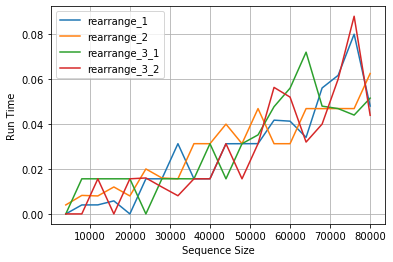

In [34]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt 
%matplotlib inline


for fun in ["rearrange_1", "rearrange_2", "rearrange_3_1", "rearrange_3_2"]:
    
    times, arr_size = [], []
    for n_execution in range(1,21):
        
        arr = list(range(0,4000*n_execution))
        random.shuffle(arr)
        n = len(arr)
        
        s = time.time()
        eval(fun)(arr, n)
        e = time.time()
        
        times.append(e-s)
        arr_size.append(n)
        
    plt.plot(arr_size, times, label = fun) 

plt.xlabel('Sequence Size') 
plt.ylabel('Run Time') 
plt.grid() 
plt.legend() 
plt.show() 